In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from yaml import load
from yaml import CLoader as Loader
import os

In [4]:
os.getcwd()

'/Users/tianqin/Desktop/rpa/meta-pde/src/hparam'

In [20]:
# load all the relevant data
path = os.path.join(os.getcwd(), 'maml_poisson_tuning')
results = []
n_expts = 6
for i in range(n_expts):
    expt_path = os.path.join(path, 'expt_'+str(i), 'log.txt')
    expt_data = pd.read_csv(expt_path, sep=',')
    expt_data['expt'] = i
    results.append(expt_data)
data = pd.concat(results, ignore_index = True)

display(data.head())
display(data.tail())

,step,meta_loss,val_meta_loss,val_err,meta_grad_norm,time,meta_loss_max,meta_loss_min,meta_loss_std,expt
0,0,54.792200,129.96127,0.629020,151.47102,21.171170,63.769646,45.814747,8.977449,0
1,1,33.357315,129.52510,0.629763,214.25037,8.969240,43.313614,23.401020,9.956297,0
2,2,36.235832,129.02472,0.632597,154.33603,10.729423,38.604313,33.867350,2.368481,0
3,3,65.738860,128.49610,0.635548,155.50720,9.245964,120.568306,10.909414,54.829445,0
4,4,106.469680,128.05608,0.637768,117.83539,9.069933,142.012480,70.926890,35.542797,0


,step,meta_loss,val_meta_loss,val_err,meta_grad_norm,time,meta_loss_max,meta_loss_min,meta_loss_std,expt
55,5,0.021654,0.159087,0.079449,0.623204,14.677056,0.026926,0.016382,0.005272,5
56,6,0.137191,0.159082,0.079449,1.661068,13.827425,0.168708,0.105674,0.031517,5
57,7,0.554290,0.159072,0.079450,3.084317,14.485784,1.006443,0.102137,0.452153,5
58,8,0.392696,0.159059,0.079451,3.380753,14.934016,0.637776,0.147617,0.245080,5
59,9,0.960547,0.159052,0.079451,1.971804,14.680927,1.872675,0.048419,0.912128,5


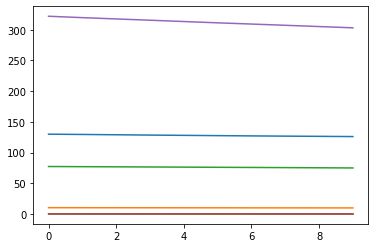

In [21]:
plt.figure()
for i in range(n_expts):
    temp_data = results[i]
    plt.plot(temp_data['step'], temp_data[' val_meta_loss'], label = 'expt_' + str(i))
plt.show()

In [43]:
def best_perf(data, perfomance_metric = ' val_meta_loss'):
    best_perf_data = data[data.step == data.step.max()].sort_values(perfomance_metric, ascending = True).head()
    # read configuration from the best performance set
    expt_n = best_perf_data['expt'].iloc[0]
    expt_path = os.path.join(path, 'expt_'+str(expt_n), '53984_conf.yaml')
    with open(expt_path, 'rb') as f:
        conf = load(f.read(), Loader=Loader)
    for key, val in conf.items():
        print(key, ":", val)
    return best_perf_data

In [44]:
best_perf_data = best_perf(data)

bc_scale : 0.023176438424213956
bc_weight : 10.0
bsize : 2
expt_name : expt_3
fixed_num_pdes : None
inner_lr : 1.1736169432071413e-08
inner_points : 10
inner_steps : 5
layer_size : 64
lr_inner_lr : 0.1
n_eval : 2
num_layers : 3
out_dir : src/hparam/maml_poisson_tuning
outer_loss_decay : 0.37556445911626546
outer_lr : 1.3676769914159898e-05
outer_points : 10
outer_steps : 10
pcgrad : 0.0
pde : poisson
siren : 0
sqrt_loss : 0
validation_points : 20
vary_bc : 1
vary_geometry : 1
vary_source : 1
viz_every : 1000


In [42]:
best_perf_data

,step,meta_loss,val_meta_loss,val_err,meta_grad_norm,time,meta_loss_max,meta_loss_min,meta_loss_std,expt
39,9,1.009619,0.154088,0.080754,2.001540,18.283371,1.974597,0.044641,0.964978,3
59,9,0.960547,0.159052,0.079451,1.971804,14.680927,1.872675,0.048419,0.912128,5
19,9,8.013544,9.921655,0.292944,111.226776,9.558705,10.507566,5.519524,2.494021,1
29,9,73.112290,74.988340,0.281614,796.931200,12.867534,77.947950,68.276620,4.835667,2
9,9,77.003006,126.094210,0.652022,191.373410,10.552221,138.533900,15.472102,61.530900,0
